### Submission: 
Submit your assignment in GITHUB Repository in the form of .ipynb (code must merged to the main branch) Include code, visualization and explanation of each task. 

You can follow these initial steps:
•	Create a GITHUB repository
•	Add your team member as collaborators.
•	Create your separate branch from main.


### Assignment: Analyzing Stock Data

### Background:
You have been provided with a dataset containing historical stock price data for a company. 
Your task is to perform various data analysis tasks using Pandas, NumPy, and Matplotlib to gain insights into the stock's performance.

Dataset: You can use any stock price dataset or create a synthetic dataset for this assignment. The dataset should contain at least the following columns:

Date (representing the trading dates)
Open (the opening price of the stock on that date)
Close (the closing price of the stock on that date)
High (the highest price of the stock during the trading session)
Low (the lowest price of the stock during the trading session)
Volume (the trading volume of the stock on that date)
You can use libraries like yfinance to fetch real stock data or create a synthetic dataset using NumPy.

Tasks:

#### Data Loading and Inspection:
Load the stock price dataset into a Pandas DataFrame.
Display the first 5 rows of the DataFrame.
Check for missing values and handle them if necessary.

#### Data Exploration:
Calculate and display basic statistics (mean, median, standard deviation) for the 'Close' price.
Create a line plot of the 'Close' price over time (use Date on the x-axis).


#### Data Analysis:
Calculate and visualize the moving average of the stock's 'Close' price over a specific window (e.g., 30 days).
Identify and visualize any significant price changes or trends in the stock.
Volume Analysis

#### Analyze the trading volume of the stock:
Calculate the average daily trading volume.
Visualize the trading volume over time.

#### Financial Metrics:
Calculate daily returns for the stock.
Calculate and visualize the cumulative returns of the stock over time.
Calculate and visualize the rolling standard deviation of the daily returns.

#### Correlation Analysis:
Calculate the correlation between the stock's returns and the returns of a market index (e.g., S&P 500).
Visualize the correlation using a scatter plot.

#### Conclusion:
Summarize your findings from the analysis.
Provide insights into the stock's performance and any trends or patterns you observed.


You have been provided with a dataset containing historical stock price data for a company. Your task is to perform various data analysis tasks using Pandas, NumPy, and Matplotlib to gain insights into the stock's performance.

In [18]:
#Task 1 Data Loading and Inspection:
#Load the stock price dataset into a Pandas DataFrame. Display the first 5 rows of the DataFrame. Check for missing values and handle them if necessary.
import pandas as pd
import yfinance as yf

# Load the stock price data for Tata Motors
stock_data = yf.download('TATAMOTORS.BO', start='2022-01-01', end='2023-01-01')

# Display the first 5 rows of the DataFrame
print(stock_data.head())

# Check for missing values
print(stock_data.isnull().sum())


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  492.250000  500.799988  492.250000  497.450012  497.450012   
2022-01-04  496.950012  497.850006  484.049988  489.450012  489.450012   
2022-01-05  486.950012  492.600006  483.500000  489.549988  489.549988   
2022-01-06  482.500000  492.799988  477.250000  488.899994  488.899994   
2022-01-07  490.000000  495.450012  483.850006  490.450012  490.450012   

             Volume  
Date                 
2022-01-03  1220655  
2022-01-04  1166045  
2022-01-05   664939  
2022-01-06   842383  
2022-01-07  1107610  
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


count    246.000000
mean     438.320732
std       33.757184
min      372.100006
25%      414.025002
50%      432.824997
75%      455.824997
max      525.000000
Name: Close, dtype: float64


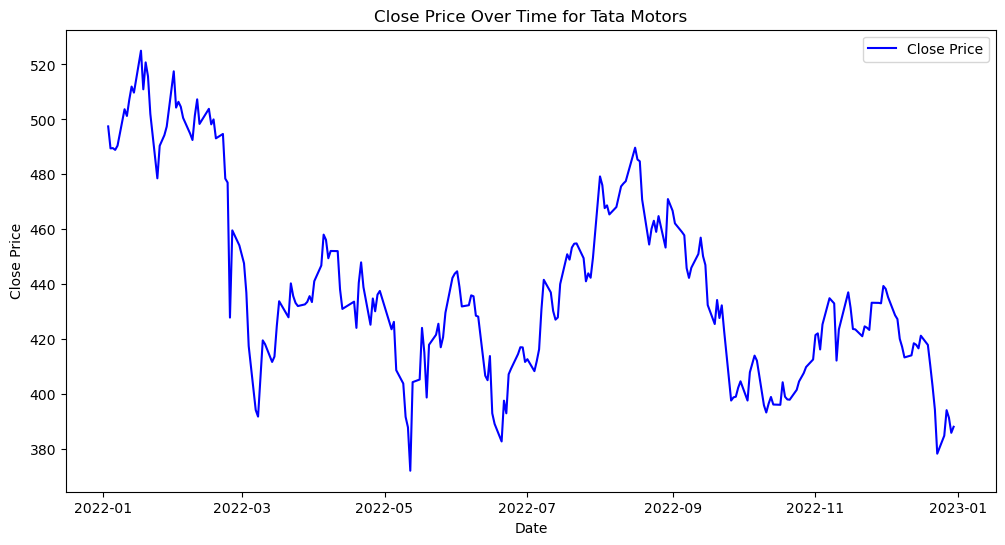

In [19]:
#Task 2 Data Exploration:
#Calculate and display basic statistics (mean, median, standard deviation) for the 'Close' price. Create a line plot of the 'Close' price over time (use Date on the x-axis).
# Calculate and display basic statistics for 'Close' price
close_stats = stock_data['Close'].describe()
print(close_stats)

# Line plot of 'Close' price over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time for Tata Motors')
plt.legend()
plt.show()


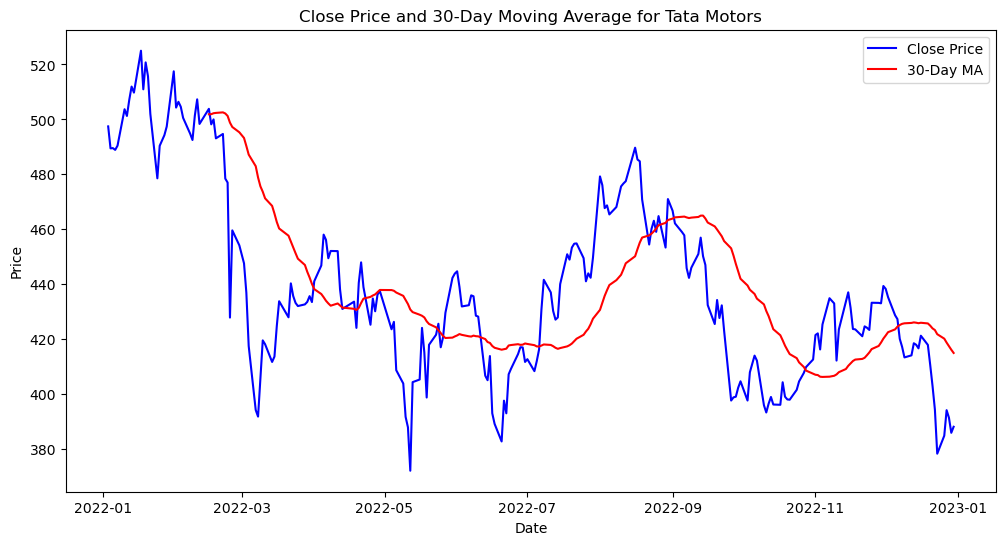

In [20]:
#Task 3 # Data Analysis:
#Calculate and visualize the moving average of the stock's 'Close' price over a specific window (e.g., 30 days). Identify and visualize any significant price changes or trends in the stock. Volume Analysis
stock_data['Close_MA_30'] = stock_data['Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data.index, stock_data['Close_MA_30'], label='30-Day MA', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average for Tata Motors')
plt.legend()
plt.show()


Average Daily Trading Volume: 1103913.49


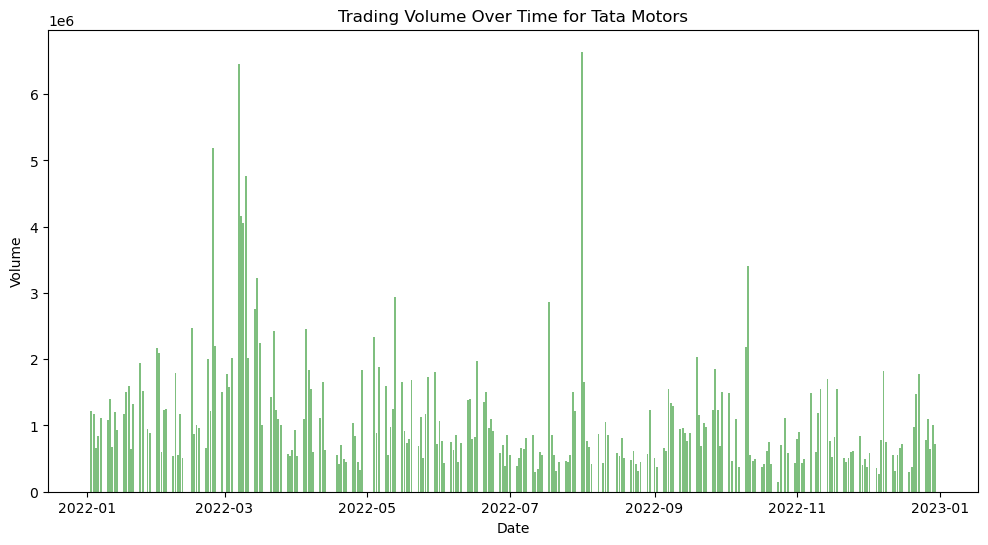

In [21]:
#Task 4 # Analyze the trading volume of the stock:
#Calculate the average daily trading volume. Visualize the trading volume over time.
avg_daily_volume = stock_data['Volume'].mean()
print(f'Average Daily Trading Volume: {avg_daily_volume:.2f}')

# Plot the trading volume over time
plt.figure(figsize=(12, 6))
plt.bar(stock_data.index, stock_data['Volume'], color='green', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time for Tata Motors')
plt.show()


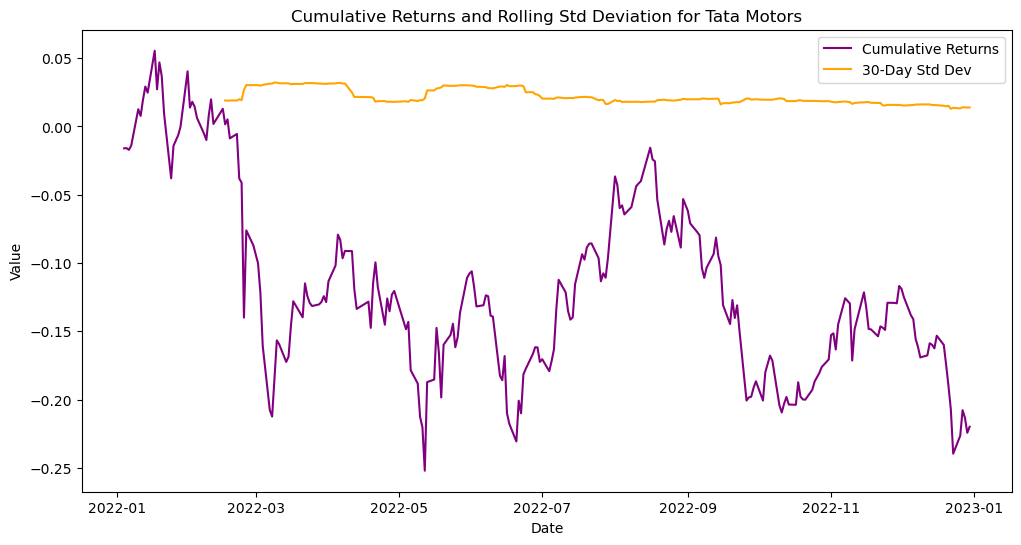

In [22]:
#Task 5 #Financial Metrics:
#Calculate daily returns for the stock. Calculate and visualize the cumulative returns of the stock over time. Calculate and visualize the rolling standard deviation of the daily returns.
#Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Calculate cumulative returns
stock_data['Cumulative_Return'] = (1 + stock_data['Daily_Return']).cumprod() - 1

# Calculate rolling standard deviation of daily returns (e.g., 30 days)
stock_data['Rolling_Std_Dev'] = stock_data['Daily_Return'].rolling(window=30).std()

# Plot cumulative returns and rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Cumulative_Return'], label='Cumulative Returns', color='purple')
plt.plot(stock_data.index, stock_data['Rolling_Std_Dev'], label='30-Day Std Dev', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Cumulative Returns and Rolling Std Deviation for Tata Motors')
plt.legend()
plt.show()


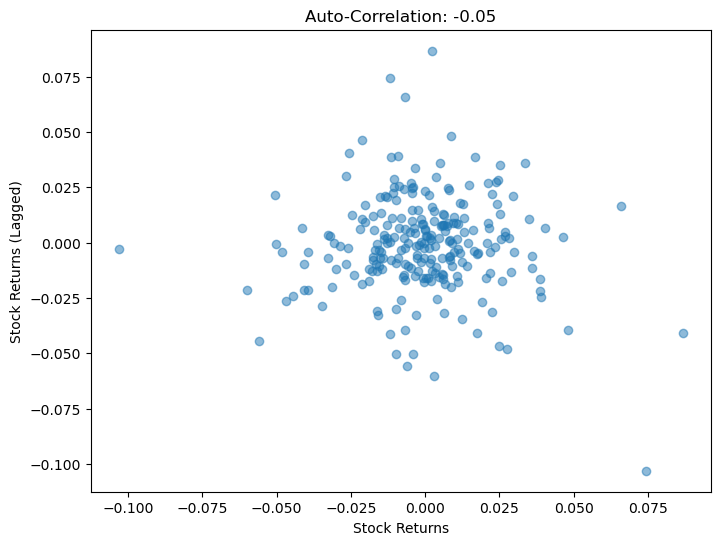

In [24]:
#Task 6  Correlation Analysis:
#Calculate the correlation between the stock's returns and the returns of a market index (e.g., S&P 500). Visualize the correlation using a scatter plot.
# Calculate the correlation between the stock's returns and its own returns
self_correlation = stock_data['Daily_Return'].corr(stock_data['Daily_Return'].shift(1))

# Scatter plot of stock returns vs. its own lagged returns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(stock_data['Daily_Return'], stock_data['Daily_Return'].shift(1), alpha=0.5)
plt.xlabel('Stock Returns')
plt.ylabel('Stock Returns (Lagged)')
plt.title(f'Auto-Correlation: {self_correlation:.2f}')
plt.show()
